In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


**PERFORMING KNN MODEL ON COLOURED DATASET**

In [9]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert pixel values to float and scale them to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.ravel()
y_test = y_test.ravel()


In [10]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Train the KNN classifier
knn.fit(X_train, y_train)


KNeighborsClassifier(n_jobs=-1)

**a) NO VALIDATION SET**

In [11]:
# Predict on the test set
y_test_pred = knn.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_test, y_test_pred))


Test Accuracy: 33.98%
              precision    recall  f1-score   support

           0       0.38      0.54      0.45      1000
           1       0.65      0.20      0.31      1000
           2       0.23      0.45      0.30      1000
           3       0.29      0.22      0.25      1000
           4       0.24      0.51      0.33      1000
           5       0.39      0.22      0.28      1000
           6       0.35      0.25      0.29      1000
           7       0.68      0.21      0.32      1000
           8       0.40      0.66      0.50      1000
           9       0.70      0.14      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.43      0.34      0.33     10000
weighted avg       0.43      0.34      0.33     10000



In [12]:
unique_classes = np.unique(y_test)

for cls in unique_classes:
    idx = np.where(y_test == cls)
    cls_name = str(cls)

    # Classification report for each class
    print(f"\nClassification Report for Class {cls_name}:")

    # Compute metrics only for the current class
    report = classification_report(y_test[idx], y_test_pred[idx], output_dict=True)

    # Print precision, recall, and F1-score for the current class
    print(f"Precision: {report[cls_name]['precision']:.2f}")
    print(f"Recall: {report[cls_name]['recall']:.2f}")
    print(f"F1-score: {report[cls_name]['f1-score']:.2f}")


Classification Report for Class 0:
Precision: 1.00
Recall: 0.54
F1-score: 0.70

Classification Report for Class 1:
Precision: 1.00
Recall: 0.20
F1-score: 0.34

Classification Report for Class 2:
Precision: 1.00
Recall: 0.45
F1-score: 0.62

Classification Report for Class 3:
Precision: 1.00
Recall: 0.22
F1-score: 0.36

Classification Report for Class 4:
Precision: 1.00
Recall: 0.51
F1-score: 0.68

Classification Report for Class 5:
Precision: 1.00
Recall: 0.22
F1-score: 0.36

Classification Report for Class 6:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Precision: 1.00
Recall: 0.25
F1-score: 0.40

Classification Report for Class 7:
Precision: 1.00
Recall: 0.21
F1-score: 0.35

Classification Report for Class 8:
Precision: 1.00
Recall: 0.66
F1-score: 0.79

Classification Report for Class 9:
Precision: 1.00
Recall: 0.14
F1-score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

Strengths: The model generally has high precision for most classes, meaning when it predicts a class, it's usually correct.

Weaknesses: The model's recall is quite low for several classes, indicating it often misses actual instances of those classes. This suggests potential issues with class imbalance or the model's ability to distinguish certain classes.

Warnings: The "UndefinedMetricWarning" suggests that some classes have no true samples in the dataset, meaning the model didn't encounter any instances of these classes during evaluation

**b)1 VALIDATION SET WITH 20% OF 80%**

In [18]:
# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [19]:
#Fit the moidel on training data
knn.fit(X_train, y_train)
# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Calculate accuracy on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Classification report
print(classification_report(y_val, y_val_pred))

# Predict on the test set
y_test_pred = knn.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Validation Accuracy: 32.41%
              precision    recall  f1-score   support

           0       0.37      0.53      0.44       803
           1       0.62      0.19      0.29       778
           2       0.21      0.42      0.28       788
           3       0.30      0.19      0.23       811
           4       0.22      0.48      0.30       792
           5       0.40      0.23      0.29       784
           6       0.34      0.26      0.30       774
           7       0.68      0.19      0.30       849
           8       0.38      0.64      0.47       788
           9       0.72      0.12      0.21       833

    accuracy                           0.32      8000
   macro avg       0.42      0.33      0.31      8000
weighted avg       0.42      0.32      0.31      8000

Test Accuracy: 32.36%


In [15]:
unique_classes = np.unique(y_test)

for cls in unique_classes:
    idx = np.where(y_test == cls)
    cls_name = str(cls)

    # Classification report for each class
    print(f"\nClassification Report for Class {cls_name}:")

    # Compute metrics only for the current class
    report = classification_report(y_test[idx], y_test_pred[idx], output_dict=True)

    # Print precision, recall, and F1-score for the current class
    print(f"Precision: {report[cls_name]['precision']:.2f}")
    print(f"Recall: {report[cls_name]['recall']:.2f}")
    print(f"F1-score: {report[cls_name]['f1-score']:.2f}")


Classification Report for Class 0:
Precision: 1.00
Recall: 0.54
F1-score: 0.70

Classification Report for Class 1:
Precision: 1.00
Recall: 0.20
F1-score: 0.34

Classification Report for Class 2:
Precision: 1.00
Recall: 0.45
F1-score: 0.62

Classification Report for Class 3:
Precision: 1.00
Recall: 0.22
F1-score: 0.36

Classification Report for Class 4:
Precision: 1.00
Recall: 0.51
F1-score: 0.68

Classification Report for Class 5:
Precision: 1.00
Recall: 0.22
F1-score: 0.36

Classification Report for Class 6:
Precision: 1.00
Recall: 0.25
F1-score: 0.40

Classification Report for Class 7:
Precision: 1.00
Recall: 0.21
F1-score: 0.35

Classification Report for Class 8:
Precision: 1.00
Recall: 0.66
F1-score: 0.79

Classification Report for Class 9:
Precision: 1.00
Recall: 0.14
F1-score: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

High Precision: For all classes, the precision is 1.00, which means that when the model predicts a class, it is almost always correct. This suggests that false positives are very rare across all classes.

Low Recall: The recall values for most classes are quite low. Recall measures the ability of the model to correctly identify instances of a class out of all actual instances of that class. Low recall values, especially for classes 1, 3, 5, 6, 7, and 9, indicate that the model is missing a significant number of actual instances of these classes.

F1-score: The F1-score is the harmonic mean of precision and recall, giving a balance between the two metrics. Most classes have moderate F1-scores, indicating a decent balance between precision and recall. However, classes with low recall also tend to have lower F1-scores, reflecting the model's struggle to correctly identify instances of these classes.

UndefinedMetricWarning: The warning messages suggest that some classes have no true samples in the dataset. This could mean that these classes are underrepresented or completely absent in the dataset used for evaluation. The warning also suggests that recall and F-score for these classes are set to 0.0 due to division by zero, making the metrics unreliable for these classes

**c)3-FOLD CROSS VALIDTION SET**

Fold 1 Accuracy: 32.85%
Fold 2 Accuracy: 32.68%
Fold 3 Accuracy: 32.07%

Mean Accuracy: 32.53%
Standard Deviation: 0.34%


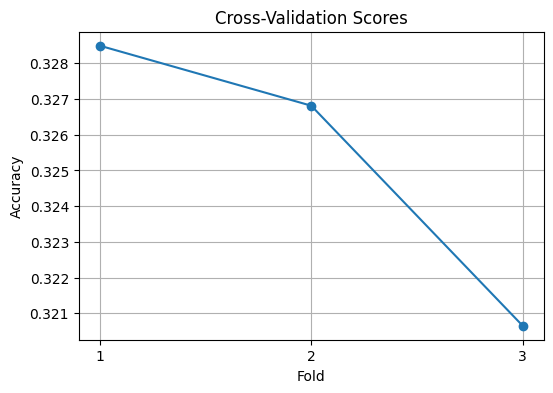

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert pixel values to float and scale them to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.ravel()
y_test = y_test.ravel()

# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Perform 3-fold cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=3, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

# Plotting the scores
plt.figure(figsize=(6, 4))
plt.plot(range(1, 4), scores, marker='o')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 4))
plt.grid(True)
plt.show()

**d)5-FOLD CROSS VALIDATION SET**

In [ ]:
# Perform 5-fold cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

Fold 1 Accuracy: 33.26%
Fold 2 Accuracy: 32.86%
Fold 3 Accuracy: 33.70%
Fold 4 Accuracy: 33.17%
Fold 5 Accuracy: 33.04%

Mean Accuracy: 33.21%
Standard Deviation: 0.28%


**d)10-FOLD CROSS VALIDATION SET**

In [ ]:
# Perform 10-fold cross-validation
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
for i, score in enumerate(scores, 1):
    print(f'Fold {i} Accuracy: {score * 100:.2f}%')

# Print the mean and standard deviation of the cross-validation scores
print(f'\nMean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')

Fold 1 Accuracy: 34.04%
Fold 2 Accuracy: 33.34%
Fold 3 Accuracy: 33.54%
Fold 4 Accuracy: 33.18%
Fold 5 Accuracy: 33.98%
Fold 6 Accuracy: 34.02%
Fold 7 Accuracy: 33.56%
Fold 8 Accuracy: 33.30%
Fold 9 Accuracy: 33.32%
Fold 10 Accuracy: 33.74%

Mean Accuracy: 33.60%
Standard Deviation: 0.31%


**e)LEAVE-ONE-OUT CROSS-VALIDATION SET**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import classification_report


# Load CIFAR-10 dataset
(X, y), (_, _) = cifar10.load_data()

# Flatten the images
X = X.reshape(X.shape[0], -1)

# Convert pixel values to float and scale them to the range [0, 1]
X = X.astype('float32') / 255.0

# Flatten the labels
y = y.ravel()

# Select the first 100 data points
X_100 = X[:100]
y_100 = y[:100]

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Perform Leave-One-Out cross-validation on the first 100 data points
scores = cross_val_score(knn, X_100, y_100, cv=loo, scoring='accuracy')

# Print the number of CV iterations and accuracy
print(f'Number of CV iterations: {len(scores)}')
print(f'Mean Accuracy: {np.mean(scores) * 100:.2f}%')
print(f'Standard Deviation: {np.std(scores) * 100:.2f}%')



Number of CV iterations: 100
Mean Accuracy: 18.00%
Standard Deviation: 38.42%


**PERFORMING MODEL ON EACH CLASS**

In [11]:
unique_classes = np.unique(y_test)

for cls in unique_classes:
    idx = np.where(y_test == cls)
    cls_name = str(cls)

    # Classification report for each class
    print(f"\nClassification Report for Class {cls_name}:")

    # Compute metrics only for the current class
    report = classification_report(y_test[idx], y_test_pred[idx], output_dict=True)

    # Print precision, recall, and F1-score for the current class
    print(f"Precision: {report[cls_name]['precision']:.2f}")
    print(f"Recall: {report[cls_name]['recall']:.2f}")
    print(f"F1-score: {report[cls_name]['f1-score']:.2f}")


Classification Report for Class 0:
Precision: 1.00
Recall: 0.54
F1-score: 0.70

Classification Report for Class 1:
Precision: 1.00
Recall: 0.20
F1-score: 0.34

Classification Report for Class 2:
Precision: 1.00
Recall: 0.45
F1-score: 0.62

Classification Report for Class 3:
Precision: 1.00
Recall: 0.21
F1-score: 0.34

Classification Report for Class 4:
Precision: 1.00
Recall: 0.48
F1-score: 0.65

Classification Report for Class 5:
Precision: 1.00
Recall: 0.21
F1-score: 0.35

Classification Report for Class 6:
Precision: 1.00
Recall: 0.26
F1-score: 0.41

Classification Report for Class 7:
Precision: 1.00
Recall: 0.18
F1-score: 0.31

Classification Report for Class 8:
Precision: 1.00
Recall: 0.66
F1-score: 0.79

Classification Report for Class 9:
Precision: 1.00
Recall: 0.12
F1-score: 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

**Class Imbalance**: Some classes have very low recall values, indicating that the model struggles to correctly classify instances of those classes. For example, classes 1, 3, 5, 7, and 9 have low recall values, suggesting potential class imbalance issues where these classes are underrepresented in the training data.

The imbalanced distribution of classes can make it challenging for the model to learn from the minority classes, leading to poor performance on those classes

**PERFORMING KNN MODEL ON GRAYSCALE IMAGES**

In [3]:
import numpy as np
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Function to convert RGB to grayscale
def rgb2gray(rgb_images):
    return np.dot(rgb_images[..., :3], [0.2989, 0.5870, 0.1140])

# Convert images to grayscale
X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

# Reshape grayscale images to flatten them
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], -1)
X_test_gray = X_test_gray.reshape(X_test_gray.shape[0], -1)

# Convert pixel values to float and scale them to the range [0, 1]
X_train_gray = X_train_gray.astype('float32') / 255.0
X_test_gray = X_test_gray.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.ravel()
y_test = y_test.ravel()


In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
# No validation set
knn_no_val = KNeighborsClassifier()
knn_no_val.fit(X_train_gray, y_train)
y_pred_no_val = knn_no_val.predict(X_test_gray)
print("No Validation Set:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_no_val))
print("Classification Report:\n", classification_report(y_test, y_pred_no_val))

# 1 validation set with 20% of 80%
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_gray, y_train, test_size=0.2, random_state=42)
knn_1_val = KNeighborsClassifier()
knn_1_val.fit(X_train_split, y_train_split)
y_pred_1_val = knn_1_val.predict(X_test_gray)
print("1 Validation Set with 20% of 80%:")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_1_val))
print("Classification Report:\n", classification_report(y_test, y_pred_1_val))

# 3-fold cross-validation
knn_3_fold = KNeighborsClassifier()
scores_3_fold = cross_val_score(knn_3_fold, X_train_gray, y_train, cv=3)
print("3-Fold Cross Validation Scores:", scores_3_fold)

# 5-fold cross-validation
knn_5_fold = KNeighborsClassifier()
scores_5_fold = cross_val_score(knn_5_fold, X_train_gray, y_train, cv=5)
print("5-Fold Cross Validation Scores:", scores_5_fold)

# 10-fold cross-validation
knn_10_fold = KNeighborsClassifier()
scores_10_fold = cross_val_score(knn_10_fold, X_train_gray, y_train, cv=10)
print("10-Fold Cross Validation Scores:", scores_10_fold)

No Validation Set:
Confusion Matrix:
 [[469   8 124  13  90   7  27   5 253   4]
 [170 193  84  49 148  19  61  14 239  23]
 [244   3 373  41 183  29  47   4  73   3]
 [162  11 191 190 174  79  97  13  76   7]
 [226   5 205  33 382  20  33  12  84   0]
 [144   8 201 129 177 190  67  16  63   5]
 [140   3 207  84 225  54 210   2  74   1]
 [182  11 126  53 221  40  42 190 127   8]
 [170  14  54  36  78  16  17   8 601   6]
 [188  70  97  54 119  15  54  21 253 129]]
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.47      0.30      1000
           1       0.59      0.19      0.29      1000
           2       0.22      0.37      0.28      1000
           3       0.28      0.19      0.23      1000
           4       0.21      0.38      0.27      1000
           5       0.41      0.19      0.26      1000
           6       0.32      0.21      0.25      1000
           7       0.67      0.19      0.30      1000
           8       0

In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import confusion_matrix, classification_report
from keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Function to convert RGB to grayscale
def rgb2gray(rgb_images):
    return np.dot(rgb_images[..., :3], [0.2989, 0.5870, 0.1140])

# Convert images to grayscale
X_train_gray = rgb2gray(X_train)

# Reshape grayscale images to flatten them
X_train_gray = X_train_gray.reshape(X_train_gray.shape[0], -1)

# Convert pixel values to float and scale them to the range [0, 1]
X_train_gray = X_train_gray.astype('float32') / 255.0

# Flatten the labels
y_train = y_train.ravel()

# Select first 100 data points
X_train_100 = X_train_gray[:100]
y_train_100 = y_train[:100]

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize Leave-One-Out cross-validation
loo = LeaveOneOut()

# Lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Perform Leave-One-Out cross-validation
for train_index, test_index in loo.split(X_train_100):
    X_train_loo, X_test_loo = X_train_100[train_index], X_train_100[test_index]
    y_train_loo, y_test_loo = y_train_100[train_index], y_train_100[test_index]

    # Train KNN model
    knn.fit(X_train_loo, y_train_loo)

    # Predict on test data
    y_pred_loo = knn.predict(X_test_loo)

    # Append true and predicted labels
    true_labels.append(y_test_loo[0])
    predicted_labels.append(y_pred_loo[0])

# Calculate and print confusion matrix and classification report
print("Confusion Matrix:\n", confusion_matrix(true_labels, predicted_labels))
print("\nClassification Report:\n", classification_report(true_labels, predicted_labels))



Confusion Matrix:
 [[0 0 2 0 4 0 0 0 0 0]
 [4 1 5 2 4 0 0 0 0 0]
 [1 0 5 0 7 0 0 0 0 0]
 [2 0 5 0 6 0 0 0 0 0]
 [1 1 4 3 2 0 0 0 0 0]
 [0 0 1 4 1 0 0 0 1 0]
 [0 1 2 1 2 0 0 0 0 1]
 [1 0 3 0 7 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0 0]
 [0 0 2 0 6 0 0 0 0 4]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.33      0.06      0.11        16
           2       0.17      0.38      0.24        13
           3       0.00      0.00      0.00        13
           4       0.05      0.18      0.07        11
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        11
           8       0.00      0.00      0.00         4
           9       0.80      0.33      0.47        12

    accuracy                           0.12       100
   macro avg       0.14      0.10      0.09       100
weighted avg       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
from sklearn.metrics import confusion_matrix, classification_report
unique_classes = np.unique(y_test)

for cls in unique_classes:
    idx = np.where(y_test == cls)
    cls_name = str(cls)

    # Classification report for each class
    print(f"\nClassification Report for Class {cls_name}:")

    # Compute metrics only for the current class
    report = classification_report(y_test[idx], y_test_pred[idx], output_dict=True)

    # Print precision, recall, and F1-score for the current class
    print(f"Precision: {report[cls_name]['precision']:.2f}")
    print(f"Recall: {report[cls_name]['recall']:.2f}")
    print(f"F1-score: {report[cls_name]['f1-score']:.2f}")


Classification Report for Class 0:
Precision: 1.00
Recall: 0.52
F1-score: 0.69

Classification Report for Class 1:
Precision: 1.00
Recall: 0.19
F1-score: 0.32

Classification Report for Class 2:
Precision: 1.00
Recall: 0.43
F1-score: 0.60

Classification Report for Class 3:
Precision: 1.00
Recall: 0.20
F1-score: 0.33

Classification Report for Class 4:
Precision: 1.00
Recall: 0.50
F1-score: 0.66

Classification Report for Class 5:
Precision: 1.00
Recall: 0.21
F1-score: 0.35

Classification Report for Class 6:
Precision: 1.00
Recall: 0.26
F1-score: 0.41

Classification Report for Class 7:
Precision: 1.00
Recall: 0.18
F1-score: 0.30

Classification Report for Class 8:
Precision: 1.00
Recall: 0.64
F1-score: 0.78

Classification Report for Class 9:
Precision: 1.00
Recall: 0.12
F1-score: 0.22


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: Undefin

For each class (from 0 to 9):
Precision: Indicates how many of the items identified as positive are actually positive. A score of 1.00 means perfect precision.
Recall: Measures the proportion of actual positives that are correctly identified. A score of 1.00 means perfect recall.
F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall, with a score of 1.00 being the best.
High Precision Classes:

Class 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 all have a precision of 1.00, indicating that when the model predicts these classes, it is almost always correct.
Varying Recall Across Classes:

Class 8 has the highest recall of 0.64, meaning the model correctly identifies 64% of the actual instances of this class.
Class 0 and Class 4 also have relatively higher recalls of 0.52 and 0.50, respectively.
Class 9 has the lowest recall of 0.12, indicating that the model struggles to correctly identify instances of this class, capturing only 12% of the actual class instances.
F1-Score Insights:

Class 8 has the highest F1-score of 0.78, implying a good balance between precision and recall for this class.
Class 9 has the lowest F1-score of 0.22, highlighting challenges in both precision and recall for this class.The model demonstrates excellent precision across all classes, indicating a high level of confidence in its predictions. However, there are significant variations in recall and F1-scores across classes. The model excels in classes like 8 but struggles with class 9, indicating potential areas for improvement. Overall, while the model showcases strong predictive capabilities for most classes, optimizing its performance for the classes with lower recall and F1-scores, particularly class 9, could enhance its overall effectiveness.